# Support Vector Regression

Thanks to Caitlin Brown, I use the linear regression code as template

Part of the code is from https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0

In [1]:
import pandas as pd
import financialanalysis as fa # 'pip install financialanalysis' in terminal if you don't have it
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./TSLA.csv')
df.Date = pd.to_datetime(df.Date)
df.Date = fa.datetimeToFloatyear(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500


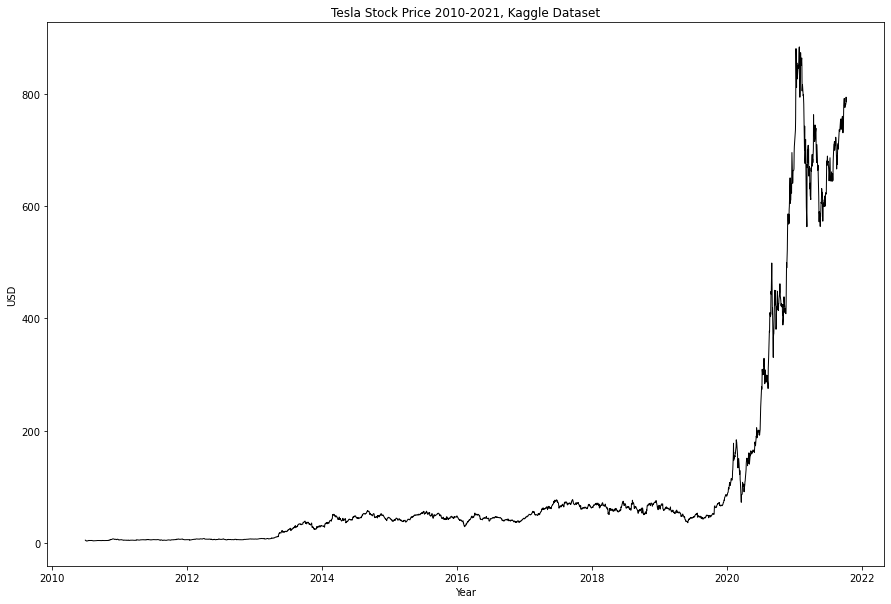

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(df.Date, df.Close, color='black',linewidth=1)
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Tesla Stock Price 2010-2021, Kaggle Dataset')
plt.show()

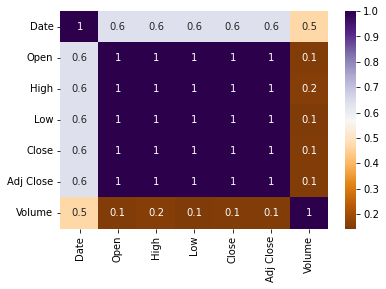

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'PuOr')

We can see that the open, close, high and low prices are highly correlated.

## Pairplot

Not sure how informative this is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2841 non-null   float64
 1   Open       2841 non-null   float64
 2   High       2841 non-null   float64
 3   Low        2841 non-null   float64
 4   Close      2841 non-null   float64
 5   Adj Close  2841 non-null   float64
 6   Volume     2841 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 155.5 KB
None


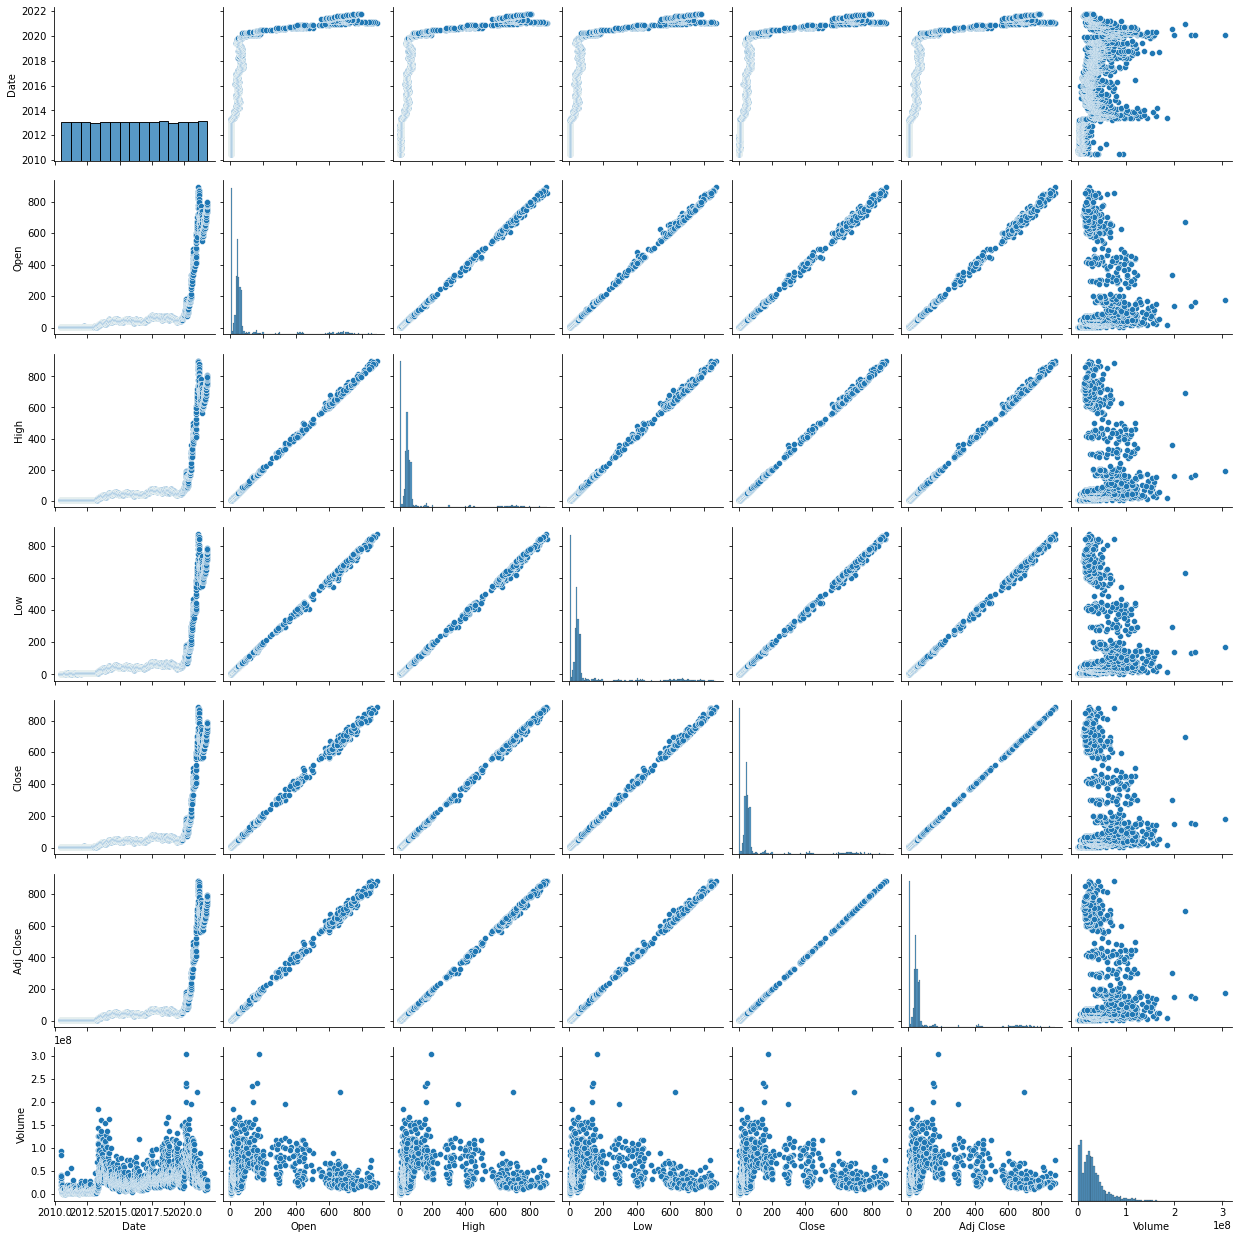

In [6]:
print(df.info())
sns.pairplot(data=df)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

# Need to be sorted for polynomial regression to work properly
train = train.sort_values(by=['Date'])
test = test.sort_values(by=['Date'])
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
5,2010.512329,3.280,3.326,2.996,3.160,3.160,34608500


#### Preparing Data

In [8]:
from sklearn.preprocessing import StandardScaler



Create the model and train it

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics

show result